# Understanding the Kernel Trick in Support Vector Machines (SVMs)

Often we encounter datasets that are linearly inseparable for classification. For linearly separable classes by using an SVM, it is easy to add a hyperplane that classifies the data. However, for linearly inseparable data, a transformation to a higher dimension will help map the data to a linearly separable space. Sometimes, this mapping can be from $R^n \to R^\inf$. One such cool ways to map the data is by using functions called kernels. Here we shall look at an example in 2-dimensions when mapped to 3-dimensions will help classify the data with a high accuracy.[1] Let us create a 2-D circles dataset.

## Exercise
* Fit a linear SVM to the dataset below using a linear kernel and assign it to the variable, svm_linear.

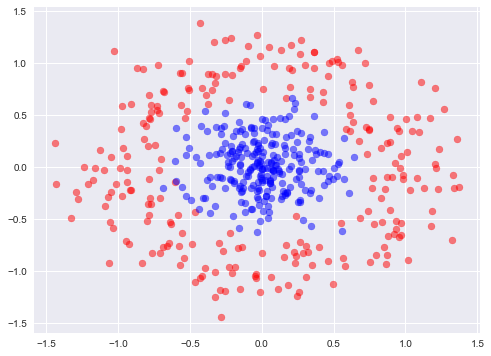

In [1]:
from sklearn.datasets import make_circles
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import numpy as np

X, y = make_circles(n_samples=500, random_state=20092017, noise=0.2, factor=0.2)

plt.figure(figsize=(8,6))

plt.scatter(X[y==0, 0], X[y==0, 1], color='red', alpha=0.5)
plt.scatter(X[y==1, 0], X[y==1, 1], color='blue', alpha=0.5)
plt.show()

Use the SVC(kernel='linear') and .fit functions to create an instance of support vector machine.

In [8]:
svm_linear = SVC(kernel='linear')
svm_linear.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [10]:
ref_tmp_var = False

try:
    ref_assert_var = False

    # Assertion block
    if svm_linear.kernel == 'linear':
        ref_assert_var = True
    else:
        ref_assert_var = False
   # print(ref_assert_var)
    
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')
else:
    if ref_assert_var:
        ref_tmp_var = True
    else:
        print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue


## Accuracy of the SVM with the linear kernel

## Exercise

* compute the accuracy of the SVM with the linear kernel and assign it to svm_score.

In [11]:
# Enter code to compute accuracy of SVM.

Use .predict to get prediction and accuracy_score to measure the score.

In [12]:
y_hat = svm_linear.predict(X)
svm_score = accuracy_score(y_hat, y)
print(svm_score)

0.644


In [13]:
ref_tmp_var = False

try:
    ref_assert_var = False
    
    # Hidden Block
    y_hat_ = svm_linear.predict(X)
    svm_score_ = accuracy_score(y_hat, y)

    # Assertion block
    if svm_score < 0.7:
        ref_assert_var = True
    else:
        ref_assert_var = False
    
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')
else:
    if ref_assert_var:
        ref_tmp_var = True
    else:
        print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue


We can see that the accuracy of the linear SVM is poor. Let us apply the rbf kernel to the classifier.

## SVM with Radial Basis Function(RBF) Kernel

RBF is defined as $K(x,y) = e^{-(\frac{\lVert x - y \rVert^2}{2\sigma^2})}$. The function weighs points around x in the neighborhood higher than those points away from x. Let us use this function and measure the score.

## Exercise

* Use rbf kernel instead of linear kernel and assign it to the variable, rbf_svm.

In [14]:
# Instatiate rbf_svm with svm kernel = 'rbf'

Use procedure similar to linear kernel.

In [15]:
rbf_svm = SVC(kernel='rbf')
rbf_svm.fit(X, y)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
ref_tmp_var = False

try:
    ref_assert_var = False
    
    # Assertion block
    if rbf_svm.kernel == 'rbf':
        ref_assert_var = True
    else:
        ref_assert_var = False
    
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')
else:
    if ref_assert_var:
        ref_tmp_var = True
    else:
        print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue


## Accuracy of the SVM with the RBF kernel


## Exercise

* compute the accuracy of the SVM with the linear kernel and assign it to svm_score.

In [17]:
# Compute accuracy_score

Use .predict and accuracy_score to compute svm score.

In [18]:
y_hat = rbf_svm.predict(X)
svm_score = accuracy_score(y_hat, y)
print(svm_score)

0.986


In [19]:
ref_tmp_var = False

try:
    ref_assert_var = False
    
    # Assertion block
    if svm_score > 0.95:
        ref_assert_var = True
    else:
        ref_assert_var = False
    
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')
else:
    if ref_assert_var:
        ref_tmp_var = True
    else:
        print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue


## Kernel Trick

Here we see that the using the kernel substantially increased the accuracy. How does it work? Let us do an experiment where we use a custom transformation by extending the dimensions of 2D points to 3D. For this purpose, let us define a transformation function,

$$\phi(x, y) = (x, y, x^2 + y^2)$$

Note that the above function transforms the space from $R^2 \to R^3$

The transformation warps the space as seen below. The decision hyperplane can cut through the warped 3D space with a linear hyperplane as shown to classify the data.

<img src="images/kernel-trick.png", style="width: 500px;">

### References

1. https://web.stanford.edu/class/cs276a/handouts/svmreview.pdf

## Exercise

* Add a new column $x^2+y^2$ and assign the new dataset $(x, y, x^2+y^2)$ to the variable trans_X.

In [27]:
# Insert code to compute trans_X
trans_X = []

Use [:, (index)] format to retrieve values for that index in X and np.c_ to concatenate a 3rd dimension to the 2-D data.

In [28]:
Z = X[:, 0]**2 + X[:, 1]**2
trans_X = np.c_[X, Z]  

In [22]:
ref_tmp_var = False

try:
    ref_assert_var = False
    
    # Hidden Block
    Z_ = X[:, 0]**2 + X[:, 1]**2
    trans_X_ = np.c_[X, Z_]  
    
    # Assertion block
    if np.all(trans_X_) == np.all(trans_X):
        ref_assert_var = True
    else:
        ref_assert_var = False
    
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')
else:
    if ref_assert_var:
        ref_tmp_var = True
    else:
        print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue


## Transformation with a linear kernel

## Exercise

* Now use a linear kernel for the SVM fit for the transformed data, compute the accuracy and assign it to the variable trans_score.

In [23]:
# Insert code below

Use techniques for fitting, prediction and measuring accuracy from the above principles.

In [24]:
svm_trans = SVC(kernel='linear')
svm_trans.fit(trans_X, y)

y_hat = svm_trans.predict(trans_X)
trans_score = accuracy_score(y_hat, y)
print(trans_score)

0.982


In [25]:
ref_tmp_var = False

try:
    ref_assert_var = False
    
    # Assertion block
    if trans_score > 0.95:
        ref_assert_var = True
    else:
        ref_assert_var = False
    
except Exception:
    print('Please follow the instructions given and use the same variables provided in the instructions.')
else:
    if ref_assert_var:
        ref_tmp_var = True
    else:
        print('Please follow the instructions given and use the same variables provided in the instructions.')

assert ref_tmp_var

continue
